<a href="https://colab.research.google.com/github/potopaa/ml_course_HWs/blob/addition%2Fnew_HW/%22HW_2_4_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

### HW:

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
medical_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HP_ML_cource/csv/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

1.1. Найкраща лінія для прогнозу charges за age для некурців (датафрейм non_smoker_df) з допомогою методу МНК (з використанням тільки numpy, без scikit learn):

In [126]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [127]:
X = non_smoker_df.age.astype(float).values.reshape(-1, 1)
y = non_smoker_df.charges.astype(float).values.reshape(-1, 1)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([[18.],
        [28.],
        [33.]]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

Коефіцієнти:

In [128]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([[-2091.42055657],
       [  267.24891283]])

In [129]:
np.dot(X_with_intercept[0], MNK_coefs)

array([2719.0598744])

Прогнози моделі:

In [130]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK[:3], y[:3]

(array([[2719.0598744 ],
        [5391.54900271],
        [6727.79356686]]),
 array([[ 1725.5523 ],
        [ 4449.462  ],
        [21984.47061]]))

RMSE:

In [131]:
def compute_rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

rmse = compute_rmse(y, predictions_MNK)
print(f"RMSE: {rmse}")

RMSE: 4662.505766636395


Візуалізація результатів:

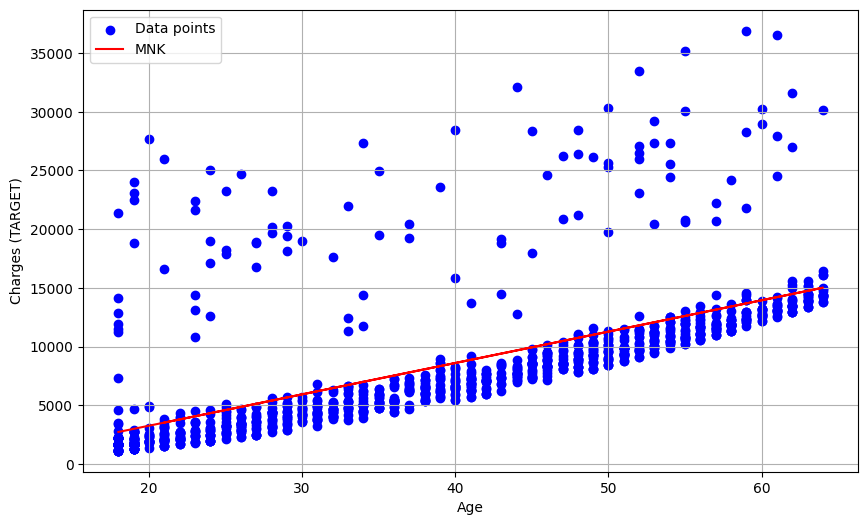

In [132]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Age')
plt.ylabel('Charges (TARGET)')
plt.legend()
plt.grid(True)
plt.show()

Аналіз якості моделі:

In [133]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y, predictions_MNK)
rmse = mean_squared_error(y, predictions_MNK, squared=False)
mae = mean_absolute_error(y, predictions_MNK)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


1.2. Найкраща лінія для прогнозу charges за age для некурців (датафрейм non_smoker_df) з допомогою методу Full-Batch градієнтного спуску з numpy:

In [134]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = np.dot(X, m)
        error = y_pred - y
        loss = np.sum(error ** 2) / (2 * n)
        errors.append(loss)
        gradient = np.dot(X.T, error) / n
        m = m - lr * gradient
    return m, errors


learning_rates = [0.001, 0.00001, 0.0001]
epochs = 1000

for rate in learning_rates:
    m, errors = full_batch_gradient_descent(X, y, lr=rate, epochs=epochs)
    predictions_fbgd = np.dot(X, m)
    print(f"Lr: {rate}, Coefs: {m}, Loss: {errors[-1]}")

Lr: 0.001, Coefs: [[220.16239904]], Loss: 11117211.16058816
Lr: 1e-05, Coefs: [[220.16239428]], Loss: 11117211.16058818
Lr: 0.0001, Coefs: [[220.16239904]], Loss: 11117211.160588158


Learning rate 0.00001 є найкращим!

Графік помилки:

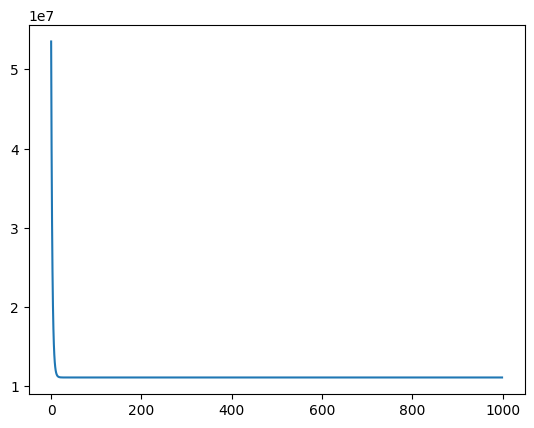

In [135]:
plt.plot(errors);

Коефіцієнти:

In [136]:
fbgd_coefs = normal_equations(X, y)
fbgd_coefs

array([[220.16239904]])

Передбачення моделі:

In [137]:
predictions_fbgd = np.dot(X, fbgd_coefs)
predictions_fbgd[:3]

array([[3962.92318278],
       [6164.54717322],
       [7265.35916843]])

RMSE:

In [138]:
rmse_fbgd = compute_rmse(y, predictions_fbgd)
print(f"RMSE: {rmse}")

RMSE: 4662.505766636395


Візуалізація:

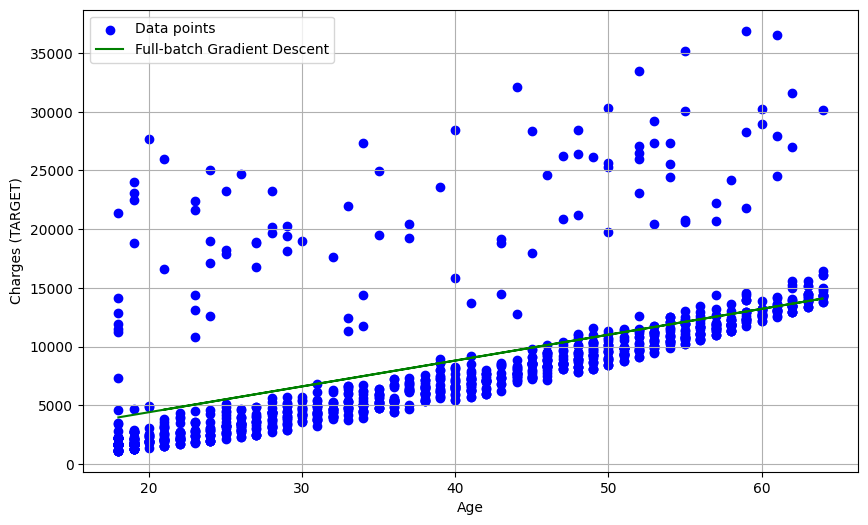

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.xlabel('Age')
plt.ylabel('Charges (TARGET)')
plt.legend()
plt.grid(True)
plt.show()

Аналіз якості моделі:

In [140]:
r2 = r2_score(y, predictions_fbgd)
rmse = mean_squared_error(y, predictions_fbgd, squared=False)
mae = mean_absolute_error(y, predictions_fbgd)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.38
Root Mean Squared Error: 4715.34
Mean Absolute Error: 2809.48


In [141]:
np.mean(y), np.std(y), np.min(y)

(8434.268297856204, 5990.9645302876115, 1121.8739)

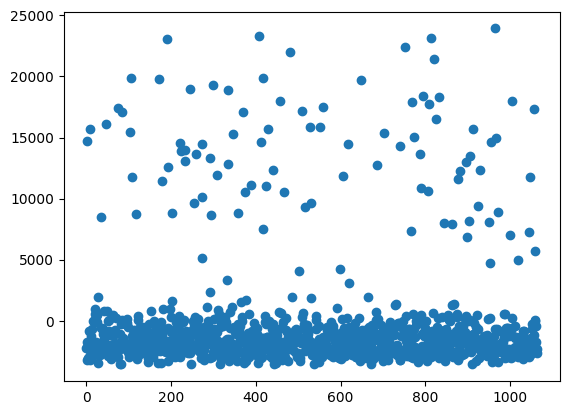

In [142]:
errors = y - predictions_fbgd
plt.plot(errors, 'o');

3. Найкраща лінія для прогнозу charges за age для некурців (датафрейм non_smoker_df) з допомогою методу scikit-learn.LinearRegression:

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [144]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Коефіцієнти моделі:

In [145]:
lin_reg.coef_, lin_reg.intercept_

(array([[267.24891283]]), array([-2091.42055657]))

Прогнози моделі:

In [146]:
predictions_sklearn = lin_reg.predict(X)
print(predictions_sklearn)

[[2719.0598744 ]
 [5391.54900271]
 [6727.79356686]
 ...
 [2719.0598744 ]
 [2719.0598744 ]
 [3520.80661289]]


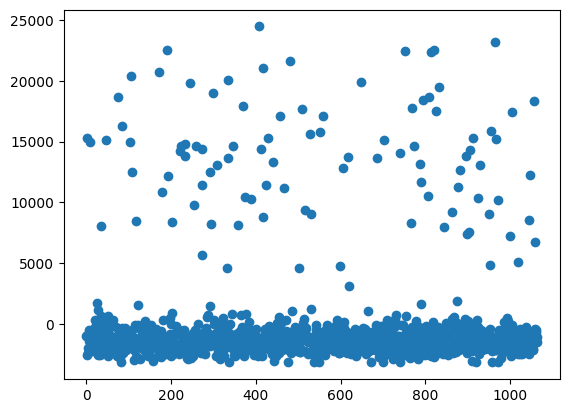

In [147]:
errors = y - predictions_sklearn
plt.plot(errors, 'o');

RMSE:


In [148]:
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
print("RMSE:", rmse_sklearn)

RMSE: 4662.505766636395


Візуалізація:

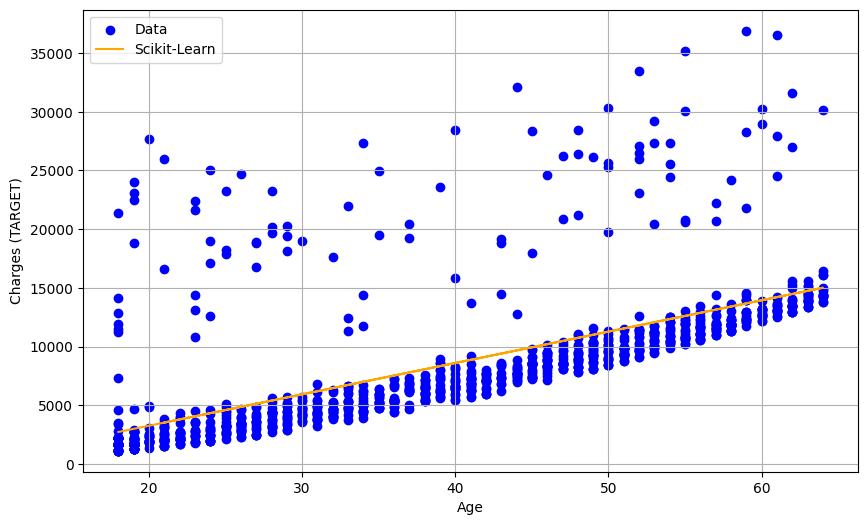

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, predictions_sklearn, color='orange', label='Scikit-Learn')
plt.xlabel('Age')
plt.ylabel('Charges (TARGET)')
plt.legend()
plt.grid(True)
plt.show()

Аналіз якості моделі:

In [150]:
r2 = r2_score(y, predictions_sklearn)
rmse = mean_squared_error(y, predictions_sklearn, squared=False)
mae = mean_absolute_error(y, predictions_sklearn)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.39
Root Mean Squared Error: 4662.51
Mean Absolute Error: 2580.52


In [151]:
np.mean(y), np.std(y), np.min(y)

(8434.268297856204, 5990.9645302876115, 1121.8739)

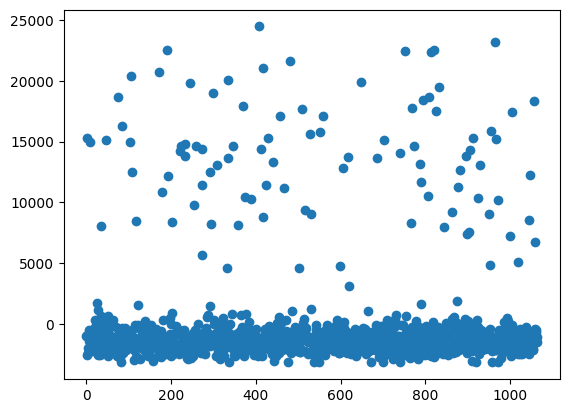

In [152]:
errors = y - predictions_sklearn
plt.plot(errors, 'o');

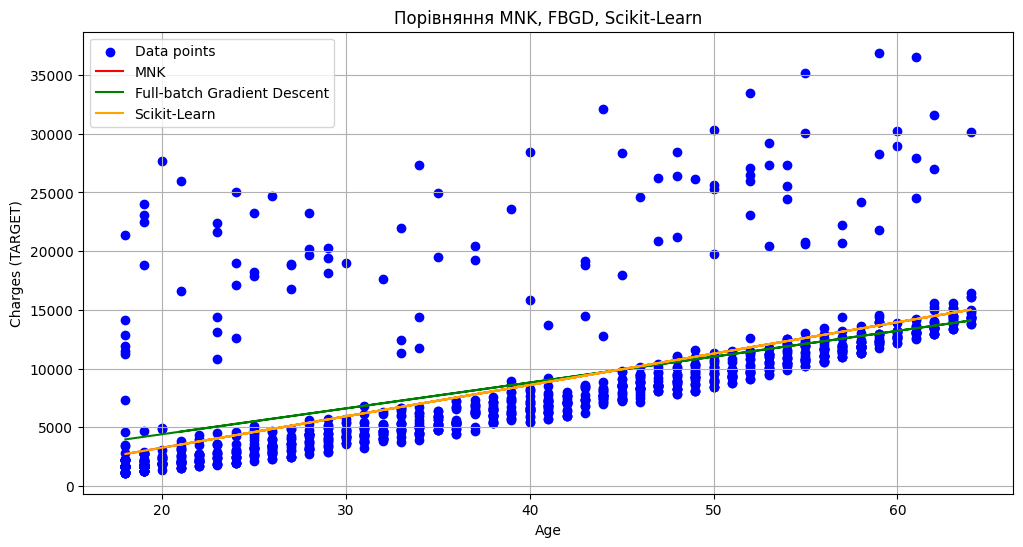

In [153]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='orange', label='Scikit-Learn')
plt.title('Порівняння MNK, FBGD, Scikit-Learn')
plt.xlabel('Age')
plt.ylabel('Charges (TARGET)')
plt.legend()
plt.grid(True)
plt.show()

Результати моделі MNK та Scikit-Learn відрізняються від FBGD

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [154]:
predictions_smoker = lin_reg.predict(X)

Оцінка точності моделі

In [155]:
accuracy = lin_reg.score(X, y)
accuracy

0.3943171632425906

In [156]:
intercept = lin_reg.intercept_
coef = lin_reg.coef_
intercept, coef

(array([-2091.42055657]), array([[267.24891283]]))

Висновки:

RMSE є високим, а R² низьким, це свідчить про те, що модель не дуже точна і погано підходить для прогнозування медичних зборів лише на основі віку. Це може означати, що вік не є єдиним або основним фактором, що впливає на медичні збори для курців. Я б не рекомендував використовувати цю модель як єдину для оцінки медичних зборів у компанії, оскільки вік не може бути достатнім показником для точного прогнозування.